### Data Dictionary

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

#from pycaret.classification import *
from pycaret.clustering import *
#from pycaret.regression import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("cars_clus.csv")

In [3]:
df

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


In [5]:
df.describe(include='all')

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
count,157,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159.000000
unique,30,158,158,118,3,154,32,69,90,80,130,149,56,24,151,NaN
top,Dodge,Neon,$null$,$null$,0.000,12.640,2.000,170.000,112.200,74.400,186.300,2.998,18.500,25.000,3.672,NaN
freq,11,2,2,38,116,2,17,9,8,6,4,3,14,22,2,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012579
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111799
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [6]:
df.shape

(159, 16)

In [7]:
df.columns

Index(['manufact', 'model', 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition'],
      dtype='object')

### Data Exploration

### Data Visualization

### Univariate Data Exploration

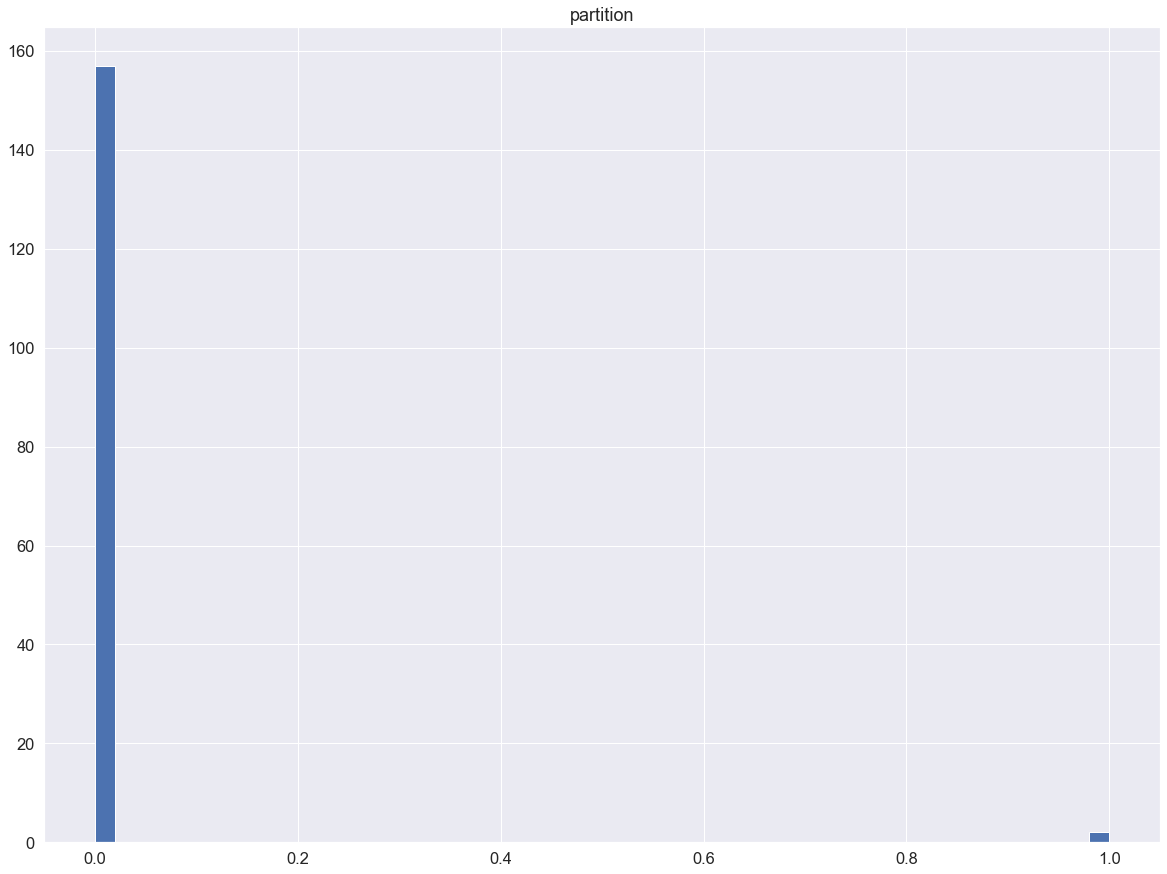

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
df.corr()

,partition
partition,1.0


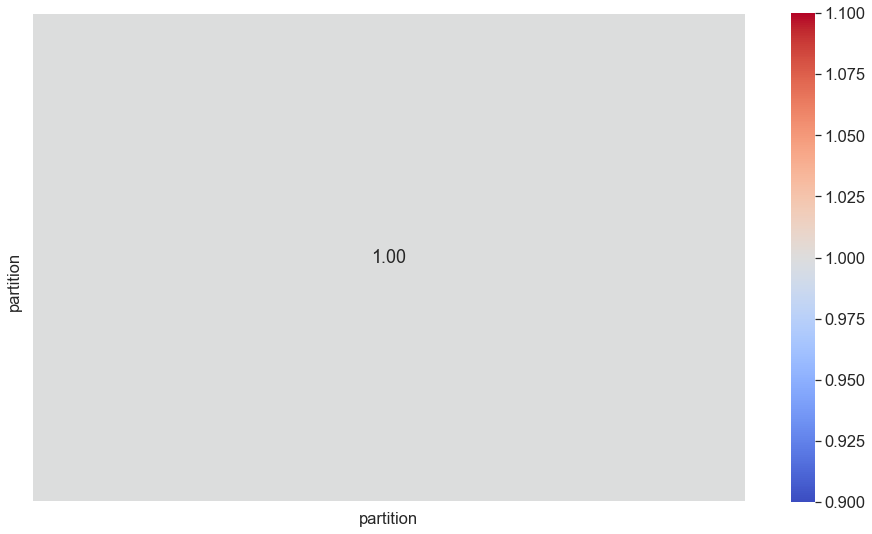

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

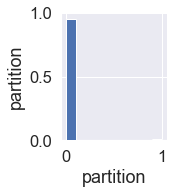

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df.isnull().sum()

manufact     2
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.shape

(157, 16)

In [15]:
df2 = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [16]:
df2

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000
1,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000
2,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000
3,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000
4,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000
...,...,...,...,...,...,...,...,...
152,1.900,160.000,100.500,67.600,176.600,3.042,15.800,25.000
153,2.400,168.000,104.900,69.300,185.900,3.208,17.900,25.000
154,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000
155,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000


### Model Training

### Using PyCaret

In [17]:
exp_clu = setup(data = df2, session_id=123, normalize=True, normalize_method='minmax') 


Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(157, 8)"
2,Missing Values,False
3,Numeric Features,0
4,Categorical Features,8
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(157, 622)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [18]:
kmeans = create_model('kmeans', num_clusters=3)

In [19]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)


In [20]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,Cluster
0,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,Cluster 0
1,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,Cluster 2
2,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,Cluster 0
3,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,Cluster 0
4,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,Cluster 1


In [21]:
plot_model(kmeans)

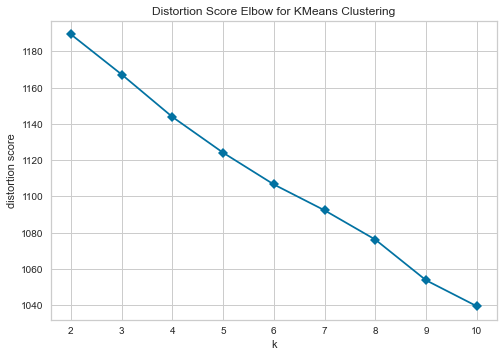

In [22]:
plot_model(kmeans, plot = 'elbow')

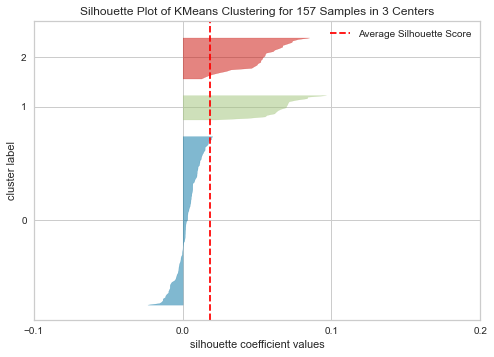

In [23]:
plot_model(kmeans, plot = 'silhouette')

In [24]:
plot_model(kmeans, plot = 'distribution') #to see size of clusters